In [65]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,roc_auc_score
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [66]:
#NEEDS TO READ FROM SQL

df = pd.read_csv("C:/Users/cdj3e/vu_bootcamp/Project_4/Resources/heart_data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0
1,67,1,4,160,286,0,2,108,1,1.5,2,0
2,67,1,4,120,229,0,2,129,1,2.6,2,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0


In [67]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
num           int64
dtype: object

In [68]:
#string_col = df.select_dtypes(include="object").columns
#df[string_col]=df[string_col].astype("string")

In [69]:
df = df.rename(columns={"age": "Age", "sex": "Sex", "cp": "Chest Pain Type", "trestbps": "Resting BP", "chol": "Cholesterol", "fbs": "Fasting Blood Sugar", "restecg": "Resting ECG", "thalach": "Max Heart Rate", "exang": "Exercise Induced Angina", "oldpeak": "OldPeak", "slope": "ST Slope", "num": "Heart Disease"})

df.head()

,Age,Sex,Chest Pain Type,Resting BP,Cholesterol,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,OldPeak,ST Slope,Heart Disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0
1,67,1,4,160,286,0,2,108,1,1.5,2,0
2,67,1,4,120,229,0,2,129,1,2.6,2,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0


In [70]:
px.imshow(df.corr(),title="Heart Disease Prediction Correlation")

In [71]:
# df = df.rename(columns={"Sex"{"0": "Male", "1": "Female"}})

fig=px.histogram(df, 
                 x="Heart Disease",
                 color="Sex",
                 hover_data=df.columns,
                 title="Heart Disease by Sex",
                 barmode="group")
fig.show()

In [72]:
fig=px.histogram(df,
                 x="Heart Disease",
                 color="ST Slope",
                 hover_data=df.columns,
                 title="Heart Disease by Slope of ST"
                )
fig.show()

In [73]:
fig=px.histogram(df,
                 x="Age",
                 hover_data=df.columns,
                 title="Distribution of Age")
fig.show()

[]

<Figure size 1500x1000 with 0 Axes>

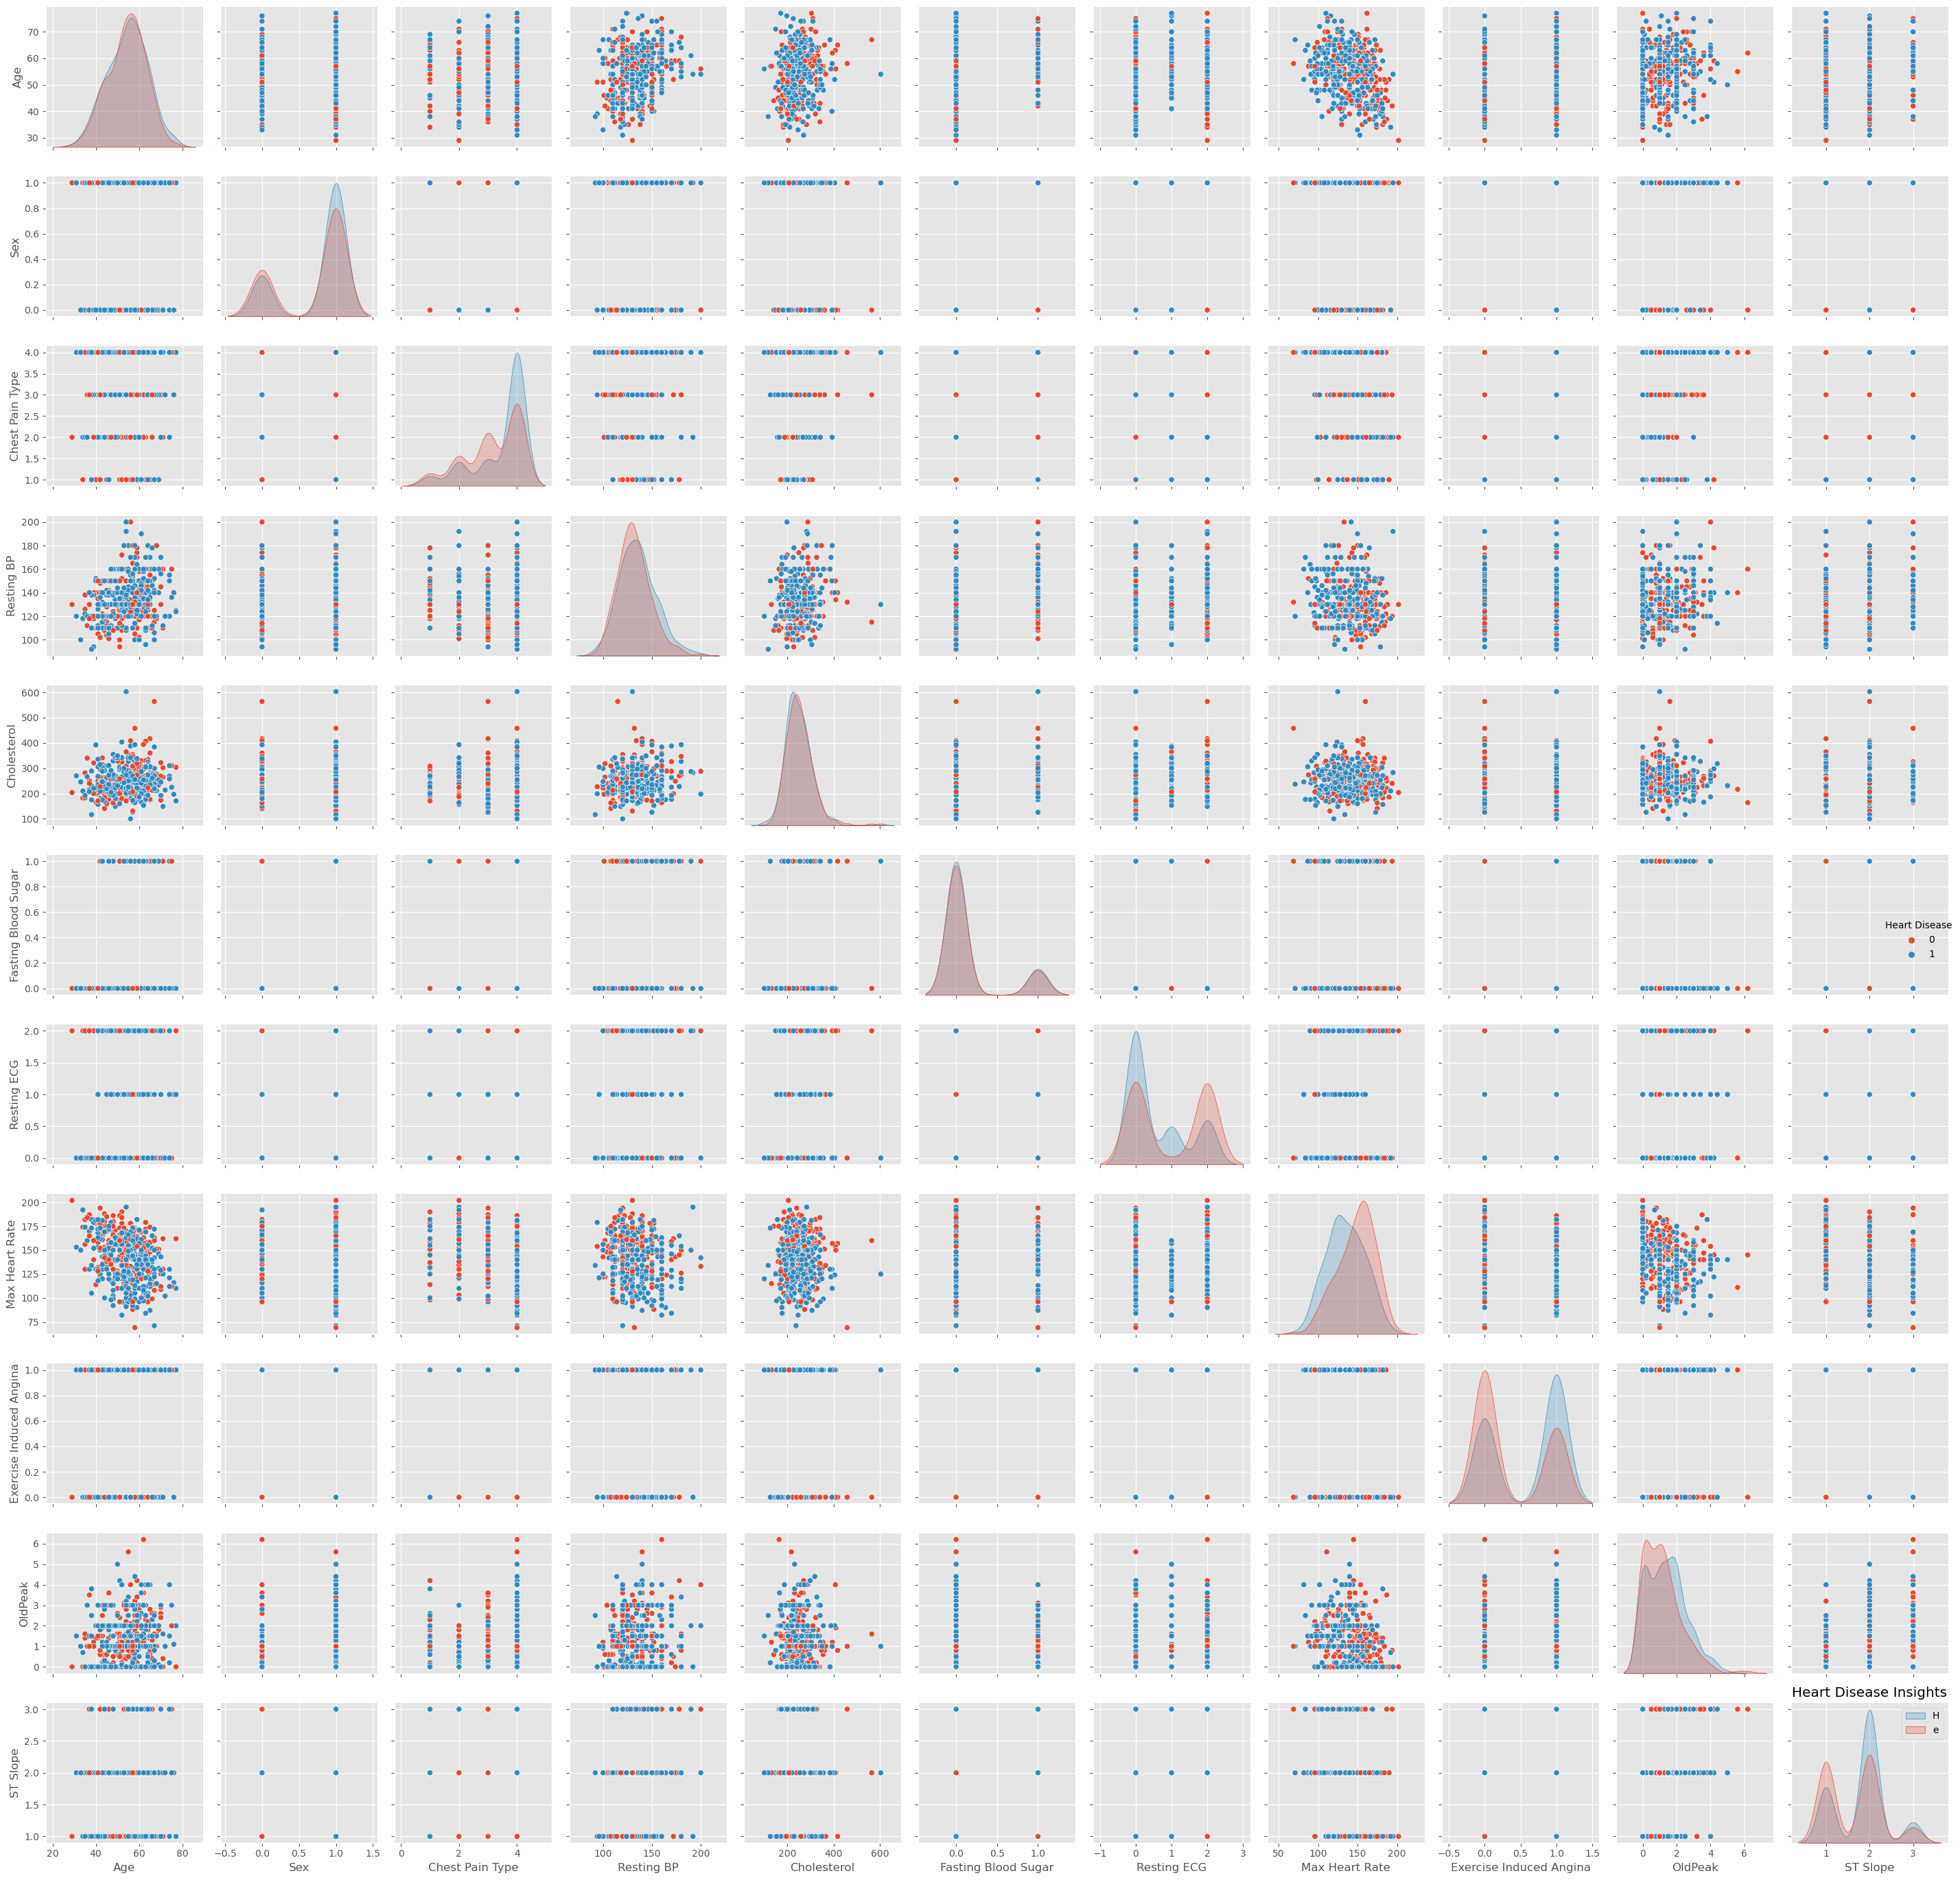

In [74]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="Heart Disease")
plt.title("Heart Disease Insights")
plt.legend("Heart Disease")
plt.tight_layout()
plt.plot()

In [75]:
fig = px.box(df,y="Chest Pain Type",x="Heart Disease",title=f"Chest Pain by Heart Disease Distribution")
fig.show()

In [76]:
fig = px.box(df,y="Resting BP",x="Fasting Blood Sugar",title=f"Resting BP Distribution by FBS",color="Sex")
fig.show()

In [77]:
y = df['Heart Disease']
X = df.drop(columns='Heart Disease')

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(345, 11)

In [79]:
models={"Logistic Regression": LogisticRegression(),
        "SVM": SVC(),
        "Decision Tree Classifier": DecisionTreeClassifier(),
        "Random Forest Classifier": RandomForestClassifier()}

In [81]:
for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

In [82]:
for i in range(len(models)):
    model=list(models.values())[i]
    model.fit

    y_prediction=model.predict(X_test)

In [83]:
for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_prediction=model.predict(X_test)

    accuracy=accuracy_score(y_test,y_prediction)

    print(str(list(models.keys())[i])+" Score = ", accuracy)

    plt.suptitle('Accuracy', color='blue')

Logistic Regression Score =  0.6347826086956522
SVM Score =  0.6173913043478261
Decision Tree Classifier Score =  0.5478260869565217
Random Forest Classifier Score =  0.6521739130434783


<Figure size 640x480 with 0 Axes>

In [ ]:
x = pd.DataFrame({
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal
 
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])
 
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])
 
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
 
sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
 
sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')
 
sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')
 
sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()

In [ ]:
df[string_col].head()
for col in string_col:
    print(f"The distribution of categorical values in the {col} is : ")
    print(df[col].value_counts())

In [ ]:
df_tree = df.apply(LabelEncoder().fit_transform)
df_tree.head()

In [ ]:
df_nontree=pd.get_dummies(df,columns=string_col,drop_first=False)
df_nontree.head()

In [ ]:
list=["Exercise Induced Angina"]
target = np.array(list)
y=df_nontree[target].values
df_nontree.drop("Exercise Induced Angina",axis=1,inplace=True)
df_nontree=pd.concat([df_nontree,df[target]],axis=1)
df_nontree.head()

In [ ]:
feature_col_nontree=df_nontree.columns.to_list()
feature_col_nontree.remove(target)

In [ ]:
# logisitic regression

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
acc_log=[]

kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    #print(pd.DataFrame(X_valid).head())
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
     
    clf=LogisticRegression()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_log.append(acc)
    print(f"The accuracy for Fold {fold+1} : {acc}")
    pass
    

In [ ]:
# naive bayes

from sklearn.naive_bayes import GaussianNB
acc_Gauss=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=GaussianNB()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_Gauss.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

In [ ]:
# svc linear kernel

from sklearn.svm import SVC
acc_svm=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="linear")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

In [ ]:
# svc sigmoid kernel

from sklearn.svm import SVC
acc_svm_sig=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="sigmoid")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm_sig.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

In [ ]:
# svc rbf kernel

from sklearn.svm import SVC
acc_svm_rbf=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="rbf")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm_rbf.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

In [ ]:
# svc poly kernel

from sklearn.svm import SVC
acc_svm_poly=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="poly")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm_poly.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

In [ ]:
# k-nearest neighbors 

from sklearn.neighbors import KNeighborsClassifier
acc_KNN=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=KNeighborsClassifier(n_neighbors=32)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_KNN.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

In [ ]:
# decision tree classifier prep

feature_col_tree=df_tree.columns.to_list()
feature_col_tree.remove(target)

In [ ]:
# decision tree classifier

from sklearn.tree import DecisionTreeClassifier
acc_Dtree=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):
    
    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]
    
    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]
    
    clf=DecisionTreeClassifier(criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_Dtree.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

In [ ]:
# decision tree classifier visualization

import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_col_tree,  
                                class_names=target,
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
# random forest classifier

from sklearn.ensemble import RandomForestClassifier
acc_RandF=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):
    
    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]
    
    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]
    
    clf=RandomForestClassifier(n_estimators=200,criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_RandF.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

In [ ]:
plt.figure(figsize=(20,15))
importance = clf.feature_importances_
idxs = np.argsort(importance)
plt.title("Feature Importance")
plt.barh(range(len(idxs)),importance[idxs],align="center")
plt.yticks(range(len(idxs)),[feature_col_tree[i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")
#plt.tight_layout()
plt.show()

In [ ]:
from xgboost import XGBClassifier
acc_XGB=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):
    
    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]
    
    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]
    
    clf=XGBClassifier()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_XGB.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

In [ ]:
fig, ax = plt.subplots(figsize=(30, 30))
from xgboost import plot_tree
plot_tree(clf,num_trees=0,rankdir="LR",ax=ax)
plt.show()
